# Wedding FOM Example

In [1]:
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from ptcr2.fom import FOM

config_file = 'samples/wedding_fom.json'
# parse file name
file_name = config_file.split('/')[-1].split('.')[0]

with open(config_file) as f:
    spec = json.loads(f.read())


In [2]:
wedding_fom = FOM()
start = timer()
wedding_fom.compute_optimal_policy(spec)
end = timer()

print('Time elapsed to compute optimal policy: ', end - start)

Formatting checks succeeded.

            Transition Matrix            
┏━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃   ┃ I   ┃ E   ┃ B   ┃ C   ┃ D   ┃ S   ┃
┡━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│ I │ 0.0 │ 0.1 │ 0.3 │ 0.1 │ 0.2 │ 0.3 │
│ E │ 0.0 │ 0.1 │ 0.2 │ 0.1 │ 0.3 │ 0.3 │
│ B │ 0.0 │ 0.2 │ 0.1 │ 0.1 │ 0.3 │ 0.3 │
│ C │ 0.0 │ 0.1 │ 0.2 │ 0.2 │ 0.3 │ 0.2 │
│ D │ 0.0 │ 0.2 │ 0.3 │ 0.1 │ 0.1 │ 0.3 │
│ S │ 0.0 │ 0.4 │ 0.2 │ 0.2 │ 0.2 │ 0.0 │
└───┴─────┴─────┴─────┴─────┴─────┴─────┘

        Initial Distribution         
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ I   ┃ E   ┃ B   ┃ C   ┃ D   ┃ S   ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│ 0.0 │ 0.1 │ 0.3 │ 0.2 │ 0.2 │ 0.2 │
└─────┴─────┴─────┴─────┴─────┴─────┘

         Cost Matrix         
┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃ I ┃ E ┃ B ┃ C ┃ D ┃ S ┃
┡━━━╇━━━╇━━━╇━━━╇━━━╇━━━╇━━━┩
│ I │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │
│ E │ 1 │ 0 │ 1 │ 2 │ 3 │ 4 │
│ B │ 2 │ 1 │ 0 │ 1 │ 2 │ 3 │
│ C │ 3 │ 2 │ 1 │ 0 │ 1 │ 2 │
│ D │ 4 │ 3 │ 2 │ 1 │ 0 │ 1 │
│ S │ 5 │ 4 │ 3 │ 2 │ 1 │ 0 │
└───┴───┴───┴───┴───┴───┴───┘

Alphabet 
┏━━━━━━━┓
┃ Items ┃
┡━━━━━━━┩
│ d1    │
│ c1    │
│ s1    │
│ c3    │
│ c2    │
│ b3    │
│ e2    │
│ d3    │
│ s2    │
│ e1    │
│ d2    │
│ d23   │
│ b1    │
│ s3    │
│ d12   │
│ b2    │
│ e3    │
└───────┘

Single initial state 0:
[[('d1', 'd2'), 'd12']]

Single initial state 1:
[[('d2', 'd3'), 'd23']]

Unreachable state have been recognized
Start checking transitions to remove
Number of transitions: 2587213
End checking transitions to remove
Start removing unreachable transitions
End removing unreachable transitions
Start removing unreachable states
End removing unreachable states
Start reindexing states
End reindexing states
Number of unreachable states removed = 0
Number of unreachable transitions removed = 0
Time elapsed to compute optimal policy:  87.3852401


In [7]:
import time
import pickle
import os
import sys

sys.setrecursionlimit(10_000)  # Will probably fail if regular

current_time = time.strftime("%Y-%m-%d-%H-%M-%S")

if not os.path.exists('saves'):
    os.makedirs('saves')

# Store the wedding_fom object to /saves for faster loads
with open(f'saves/{file_name}_{current_time}.pkl', 'wb') as f:
    pickle.dump(wedding_fom, f)

In [2]:
import pickle
import os
# open the latest save file. Note that when running, current_time might not exist, so grab files first and pick the latest to load
files = os.listdir('saves')
files = [f for f in files if f.startswith(file_name)]
files.sort()
latest_file = files[-1]

# This assumes that only wedding_fom objects are stored in the saves folder.

with open(f'saves/{latest_file}', 'rb') as f:
    wedding_fom = pickle.load(f)

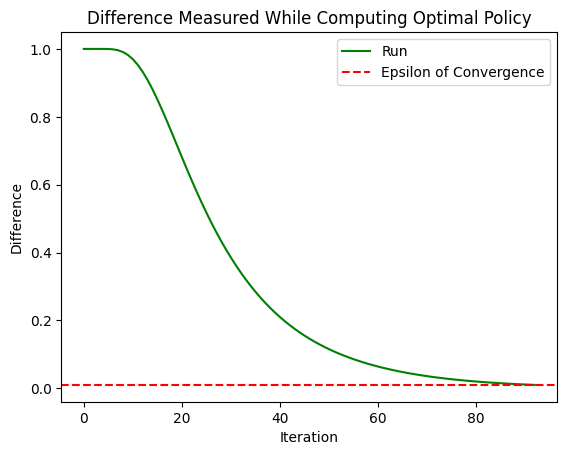

In [3]:
plt.title('Difference Measured While Computing Optimal Policy')
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.plot(wedding_fom.computed_policy['diff_tracker'], 'g', label='Run')
plt.axhline(wedding_fom.epsilon, linestyle='--', color='r', label='Epsilon of Convergence')
plt.legend()

In [4]:
results = wedding_fom.simulate_general_and_greedy_algorithms()  # Spec not needed since we're computing optimal policy separately

print(results)

{'general_algorithm': {'steps': 11, 'story': 'd2s3d12s3c3', 'total_cost': 0}, 'greedy_algorithm': {'steps': 32, 'story': 's3d2s3c3d12', 'total_cost': 0}}
